# PISA Exploration
## by Zack Tobin

## Investigation Overview

The PISA data consists of a survey of students' skills and knowledge as they approach the end of compulsory education. Rather than examining how well students have learned the school curriculum, it looks at how well prepared they are for life beyond school. Around 510,000 students in 65 economies took part in the PISA 2012 assessment of reading, mathematics and science representing about 28 million 15-year-olds globally. This dataset consists of over 2 million rows and 636 columns.



In [24]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [25]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('pisa2012.csv', sep=',', encoding='latin-1', error_bad_lines=False, index_col=False, dtype='unicode')
df.head()

,Unnamed: 0,CNT,SUBNATIO,STRATUM,OECD,NC,SCHOOLID,STIDSTD,ST01Q01,ST02Q01,...,W_FSTR75,W_FSTR76,W_FSTR77,W_FSTR78,W_FSTR79,W_FSTR80,WVARSTRR,VAR_UNIT,SENWGT_STU,VER_STU
0,1,Albania,0080000,ALB0006,Non-OECD,Albania,0000001,00001,10,1,...,13.7954,13.9235,13.1249,13.1249,4.3389,13.0829,19,1,0.2098,22NOV13
1,2,Albania,0080000,ALB0006,Non-OECD,Albania,0000001,00002,10,1,...,13.7954,13.9235,13.1249,13.1249,4.3389,13.0829,19,1,0.2098,22NOV13
2,3,Albania,0080000,ALB0006,Non-OECD,Albania,0000001,00003,9,1,...,12.7307,12.7307,12.7307,12.7307,4.2436,12.7307,19,1,0.1999,22NOV13
3,4,Albania,0080000,ALB0006,Non-OECD,Albania,0000001,00004,9,1,...,12.7307,12.7307,12.7307,12.7307,4.2436,12.7307,19,1,0.1999,22NOV13
4,5,Albania,0080000,ALB0006,Non-OECD,Albania,0000001,00005,9,1,...,12.7307,12.7307,12.7307,12.7307,4.2436,12.7307,19,1,0.1999,22NOV13


In [26]:
columns = ['CNT', 'OECD', 'STIDSTD', 'ST04Q01', 'WEALTH', 'OUTHOURS', 'PV1MATH', 'PV1READ', 'PV1SCIE','ST26Q10','IC02Q04']
df = df[columns]
#rename columns
Col_dict = {'CNT':'Country', 'OECD':'OECD', 'STIDSTD':'Student_ID','ST04Q01':'gender', 'ST01Q01':'Grade',
                             'WEALTH':'wealth_index', 'OUTHOURS':'Hrs_Studied_At_Home', 'PV1MATH':'Math', 'PV1READ':'Reading',
                             'PV1SCIE':'Science', 'ST26Q10':'Textbooks', 'IC02Q04':'Internet at school'}
Col_dict

df.rename(columns = Col_dict, inplace =True)
df.head()

,Country,OECD,Student_ID,gender,wealth_index,Hrs_Studied_At_Home,Math,Reading,Science,Textbooks,Internet at school
0,Albania,Non-OECD,00001,Female,-2.92,NaN,406.8469,249.5762,341.7009,Yes,NaN
1,Albania,Non-OECD,00002,Female,0.69,8,486.1427,406.2936,548.9929,Yes,NaN
2,Albania,Non-OECD,00003,Female,-0.23,24,533.2684,401.21,499.6643,Yes,NaN
3,Albania,Non-OECD,00004,Female,-1.17,17,412.2215,547.363,438.6796,Yes,NaN
4,Albania,Non-OECD,00005,Female,-1.17,NaN,381.9209,311.7707,361.5628,Yes,NaN


In [27]:
#Change data to integers
df['Hrs_Studied_At_Home'] = pd.to_numeric(df['Hrs_Studied_At_Home'], errors='coerce')
df['Math'] = pd.to_numeric(df['Math'], errors='coerce')
df['Reading'] = pd.to_numeric(df['Reading'], errors='coerce')
df['Science'] = pd.to_numeric(df['Science'], errors='coerce')
df['wealth_index'] = pd.to_numeric(df['wealth_index'], errors='coerce')

## Visualization 1

The first thing I want to compare are the study habits and Math, Science scores of students who live in an OECD country compared those who don't live in a OECD country. The OECD is the Oraganization for Economic Co-operation and Development. It primarily consists of wealthy countries like the USA, Canada, Australia, and Western Europe. In this chart we can see students from OECD countries actually study 2 hours less per week

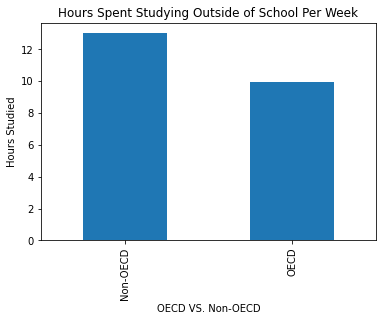

In [28]:
OECD_Study = df.groupby('OECD')['Hrs_Studied_At_Home'].mean()
OECD_Study.plot.bar()
plt.xlabel('OECD VS. Non-OECD')
plt.ylabel('Hours Studied')
plt.title('Hours Spent Studying Outside of School Per Week')
plt.show()


## Visualization 2

And yet we can see that depsite studying less, students from OECD countries score conistently better in Math, Science, and Reading

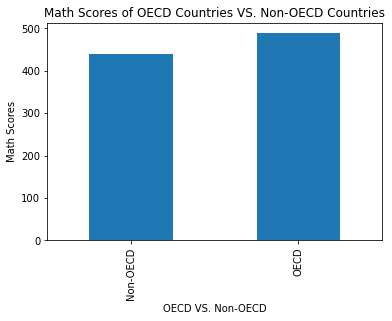

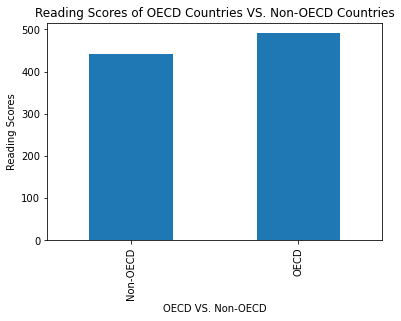

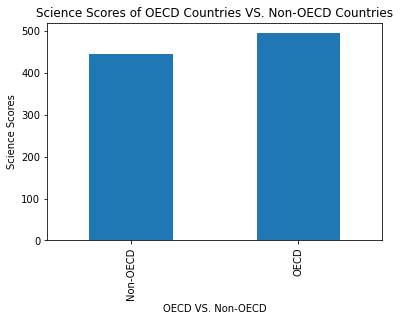

In [29]:
OECD_Math = df.groupby('OECD')['Math'].mean()
OECD_Math.plot.bar()
plt.xlabel('OECD VS. Non-OECD')
plt.ylabel('Math Scores')
plt.title('Math Scores of OECD Countries VS. Non-OECD Countries')
plt.show()

OECD_Reading = df.groupby('OECD')['Reading'].mean()
OECD_Reading.plot.bar()
plt.xlabel('OECD VS. Non-OECD')
plt.ylabel('Reading Scores')
plt.title('Reading Scores of OECD Countries VS. Non-OECD Countries')
plt.show()

OECD_Science = df.groupby('OECD')['Science'].mean()
OECD_Science.plot.bar()
plt.xlabel('OECD VS. Non-OECD')
plt.ylabel('Science Scores')
plt.title('Science Scores of OECD Countries VS. Non-OECD Countries')
plt.show()


## Visualization 3

Here we can see that while there is a positive correlation between how many hours per week students study, and their test scores, there is a far stronger correlation between their wealth and their test scores

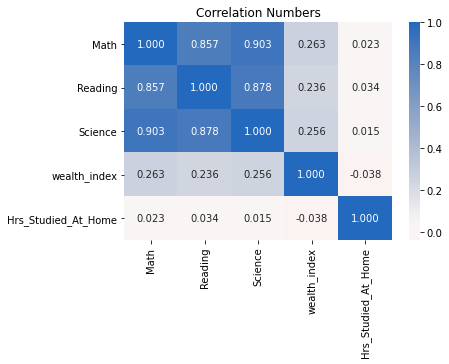

In [30]:
 numeric_vars = ['Math', 'Reading', 'Science', 'wealth_index', 'Hrs_Studied_At_Home']
sb.heatmap(df[numeric_vars].corr(),
           annot=True,
           fmt='.3f',
           cmap='vlag_r',
           center=0)
plt.yticks(rotation=0)
plt.title('Correlation Numbers');

## Visualization 4
As we can see in the final visuals, one thing that less wealthy students is lacking are textbooks. Here we can see less wealthy students are less likely to own textbooks, and in turn less likely to perform well on tests. This shows that the real gap between those who who do well on tests and those who don't, comes down  more to who has the better resources, and less to do with who studies more.


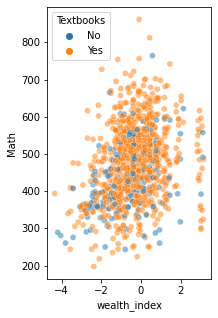

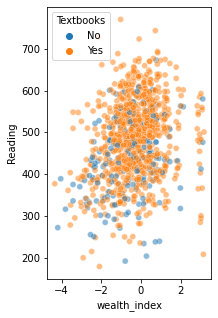

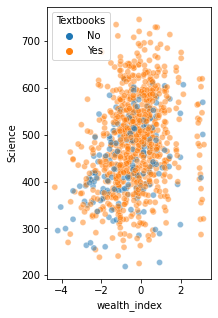

In [33]:
df_subset = df.sample(1000, random_state=42)

plt.figure(figsize=[10,5]);
plt.subplot(1,3,1)
sb.scatterplot(data = df_subset, x = 'wealth_index', y = 'Math', x_jitter=0.3, hue='Textbooks', alpha=.5);

plt.figure(figsize=[10,5]);
plt.subplot(1, 3, 2)
sb.scatterplot(data = df_subset, x = 'wealth_index', y = 'Reading', x_jitter=0.3, hue='Textbooks', alpha=.5);

plt.figure(figsize=[10, 5]);
plt.subplot(1,3,3)
sb.scatterplot(data = df_subset, x = 'wealth_index', y = 'Science', x_jitter=0.3, hue='Textbooks', alpha=.5);

> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > `jupyter nbconvert <file_name>.ipynb --to slides --post serve --template output_toggle`

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure you remove all of the quote-formatted guide notes like this one
before you finish your presentation!

In [1]:
!jupyter nbconvert Pisa_slideshow.ipynb --to slides --post serve  --no-input --no-prompt 

[NbConvertApp] Converting notebook Pisa_slideshow.ipynb to slides
[NbConvertApp] Writing 838891 bytes to Pisa_slideshow.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Traceback (most recent call last):
  File "/Users/zacktobin/opt/anaconda3/bin/jupyter-nbconvert", line 11, in <module>
    sys.exit(main())
  File "/Users/zacktobin/opt/anaconda3/lib/python3.8/site-packages/jupyter_core/application.py", line 270, in launch_instance
    return super(JupyterApp, cls).launch_instance(argv=argv, **kwargs)
  File "/Users/zacktobin/opt/anaconda3/lib/python3.8/site-packages/traitlets/config/application.py", line 845, in launch_instance
    app.start()
  File "/Users/zacktobin/opt/anaconda3/lib/python3.8/site-packages/nbconvert/nbconvertapp.py", line 350, in start
    self.convert_notebooks()
  File "/Users/zacktobin/opt/anaconda3/lib/python3.8/site-packages/nbconvert/nbconvertapp.py", line 524, in convert_notebooks
    self.con

In [ ]:
!jupyter nbconvert pisa_slide_deck.ipynb --to slides --post serve  --no-input --no-prompt 